## Importing Libraries

In [652]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the Train and Test dataset

In [653]:
data_train = pd.read_excel('Data_Train.xlsx',usecols = [0,1,2,3,4,6,7,8]) #Excluding the Synopsis column.
data_test = pd.read_excel('Data_Test.xlsx',usecols = [0,1,2,3,4,6,7,8])

In [654]:
price_train = data_train.Price
price_train
data_train = data_train.drop(labels = 'Price',axis = 1)

In [655]:
data_train

,Title,Author,Edition,Reviews,Ratings,Genre,BookCategory
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,Action & Adventure (Books),Action & Adventure
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts"
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,International Relations,Humour
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,Contemporary Fiction (Books),"Crime, Thriller & Mystery"
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,Photography Textbooks,"Arts, Film & Photography"
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5 out of 5 stars,8 customer reviews,Healthy Living & Wellness (Books),Sports
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4 out of 5 stars,72 customer reviews,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery"
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7 out of 5 stars,16 customer reviews,Sports Training & Coaching (Books),Sports
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2 out of 5 stars,111 customer reviews,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts"
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0 out of 5 stars,1 customer review,Action & Adventure (Books),Action & Adventure


## Handling 'Ratings' and 'Reviews' columns

In [656]:
data = pd.concat([data_train,data_test]) #Concatenating and preprocessing the train and test data together!

data['Ratings'] = data['Ratings'].map(lambda x:x.rstrip(' customer reviews'))
data['Ratings'] = data['Ratings'].str.replace(',','').astype(int)

In [657]:
data['Reviews'] = data['Reviews'].map(lambda x:x.rstrip(' out of 5 stars')).astype(float)

In [658]:
new = data['Edition'].str.split(",",n = 1,expand = True)


In [659]:
data['Edition'] = new[0]

In [660]:
data['Date'] = new[1]

In [661]:
date = data['Date'].str.split(' ',n = 1, expand = True)

In [662]:
date = date[1].drop(index = 0)

### Handling Dates

Creating a function to reverse the string of the column containing dates and separating the columns into Year,Month and Date column based on spaces.

In [663]:
def rev(series):
    revlist = []
    for i in series:
        j = i.split(" ")
        j = j[-1::-1]
        k = ' '.join(j)
        print(k)
        revlist.append(k)
    return revlist

In [664]:
date = rev(date)

2012 Nov 7
1982 Feb 25
2017 Oct 5
2006 Oct 10
2009 May 5
2017 Oct 5
2018 Mar 1 Import,
2015 Dec 15
2013 Mar 26
2017 Jan 20
2018 Jun 14 Import,
1999 Jul 1
2002 Nov 15
2011 Sep 1
2015 Feb 26
2018 Mar 8
2016 Nov 1
1991 Jan 1
2016
2018 Nov 24
2018 Oct 4 Import,
2012 Jul 5
2014 Nov 1
2012 Aug 31
2011 Oct 18 Edge, Deckle
2016 Mar 1
2014 Jun 15 set, Box
2014 Sep 15
1989 Apr 23
2013 Nov 21
2015 Jul 21
2000 Oct 14
2005 Sep 5
2016 May 10
2019
2014 Jun 11
2009 Apr 17
2006 Nov 30
2013 Dec 1
2013 Jan 3
2013 Sep 28
2008 Aug 20
2015 Jul 8
2019
2014 Jul 3
2006 Dec 29
2014 Feb 22
2012 Nov 1
2012 Mar 30
2017 Jan 12 Import,
2016 Jun 16
2018 Jun 7 Import,
2000 Oct 5
2018 Aug 24 Import,
2019 Mar 22
2017 Apr 21
2016 Oct 4
2015 May 7
2013 Jan 1
2016
2016 Dec 25
2004 Sep 2
2018 Jul 10
2014 Apr 27
1999 Mar 2
2010 Oct 7
2013 Mar 7 Edition, International
2014 Oct 12
2011 Jul 5
2016 Sep 1
2016 Sep 13
2018 Sep 27 Import,
2016 Nov 22
2016 Sep 6
2015 Nov 12
2019 Jan 21
2007 Nov 1 Unabridged,
2008 May 6 Edition, Spec

2008 Feb 25
2016 Aug 3
2017 Dec 21 Import,
2015 Aug 20
2008 Feb 7
2016 Dec 20
2007 Jan 29
2018 Nov 3
2016 May 23
2015
2012 Sep 28
2016 Jan 11
2009 Sep 30
2015 Nov 5
1997 May 29
2014 Oct 22
2017 Apr 20
2018 Sep 25 Import,
2007 Jan 1 Edition, Special
1994 Jan 25
2010 Aug 19
2018 Oct 9
2016 Feb 8
1977 Apr 7 Import,
2012 Apr 12
2014 Aug 20
2016 Jun 16
2004 Oct 7
2017 Sep 15
2016
set Box Audiobook, Abridged,
2019
2012 Oct 16
2018 Jan 2
2012 Jul 16
2008 Dec 4
2017 Dec 6
2010 Dec 31
2019 Feb 20
2015 Sep 15
2008
2016 Jun 7
2019 Mar 22
2003 Jul 8
2018 Jan 30 Import,
2008 Sep 4
2019 Mar 15
2009 Mar 3
2016 Jan 15
1999 Apr 1 Import,
2019 May 22 Import,
2013 Dec 1
2013 Mar 19
2017 May 4
2013 Jan 1
2018 Dec 4 Import,
2017 Oct 24
2000 Oct 14
2017 Oct 5
2018
2018 Feb 26
2011 Oct 4
2018 Sep 6 Import,
2018 May 7
1989
2012 Jun 21 Import,
2019 Feb 28
2017 Apr 4
2015 Dec 1
2015 Jun 18
2016 May 5
2017
1995 Oct 5
2017 Jul 13
2015 Dec 8
2018 Feb 15
2018 Sep 20
2016 Oct 6
2013 Dec 31
2008 Apr 8 Edition, Deluxe

2014 Dec 17
2015 Dec 4
2018 Dec 21
2015 Sep 17
2014 Apr 22
2015 Dec 14
2012 Sep 3
2016 Jul 7 Import,
1999 Feb 17
2013
2010 Oct 31
2009 Dec 1
1992 Apr 23
2011
2018 Mar 1
2017 Jun 6
2008 Jan 10
2006 Apr 5
2016 Nov 15
2017 Aug 1
2013 Jan 1
2008 Oct 14
2011
2015 May 1 Import,
2018 Feb 8
2011 May 26
2019 Apr 9
2011 Mar 3
2013
2018 May
2015 Jul 16
2005 May 19
2008 Jan 22 Illustrated,
1986 Nov 1
2014 Aug 1
2000 Sep 7
2017 Apr 6
2012 Oct 23
2018 Nov 23
2012 Mar 1
2019 Feb 5
2016 Sep 27
2000 Sep 19
2018 Jun 28
2007 Nov 14
2009 May 19
2005 May 10
2019 Feb 25 Import,
2014 Jun 3
2015 Jan 12
2004 Jun 3
2013 Aug set, Box
2002 Jun 5
2017 Oct 10
2017 May 7
2011 Apr 14
2008 Jun 3
2014 Aug 5 Import,
2018 Dec 15
2012 Dec 11
1992 Jan 1
2011 Oct 7
2011 Jul 7
2016 Nov 2
2010 Nov 16
2014 Jun 3
2008 Jan 1
2017 Mar 8
2018 Nov 18
2018 Sep 6 Import,
2007 Jul 30
2016 Sep 27 Import,
2014 Mar 4
2006 Aug 14
2019 May 20
2012 Nov 22 EveryBook,
2016 Dec 1 Import,
1976 Jul 16
2009 May 5
2010 Nov 22
2017 Jul 18
2017 Mar 

In [665]:
date = pd.Series(date)

In [666]:
date = date.str.split(' ',n = 4, expand = True)

In [667]:
data['Year'] = date[0]
data['Month'] = date[1]
data['Date'] = date[2]

In [668]:
date[3] = date[3].fillna('NoType')

In [669]:
date[3] = date[3].str.split(',',n=1,expand = True)

In [670]:
data['EditionType'] = date[3]

In [671]:
data['Date'] = data['Date'].fillna('15')

Replacing String values with midpoint of the highest and lowest values of year and dates and alloting the middle-most month to non date type data.

In [672]:
data['Year'] = data['Year'].replace('Import','1959')# Replacing with midpoint of the oldest and the latest year books
data['Year'] = data['Year'].replace('Audiobook','1959')
data['Year'] = data['Year'].replace('Edition','1959')
data['Year'] = data['Year'].replace('Facsimile','1959')
data['Year'] = data['Year'].replace('NTSC','1959')
data['Year'] = data['Year'].replace('Unabridged','1959')
data['Year'] = data['Year'].replace('set','1959')
data['Year'] = data['Year'].replace('Print','1959')

In [673]:
data['Year'] = data['Year'].astype(int)

In [674]:
data['Date'] = data['Date'].replace('Audiobook,','15')
data['Date'] = data['Date'].replace('Edition,','15')
data['Date'] = data['Date'].replace('Illustrated,','15')
data['Date'] = data['Date'].replace('Import,','15')
data['Date'] = data['Date'].replace('Large','15')
data['Date'] = data['Date'].replace('Print,','15')
data['Date'] = data['Date'].replace('Student','15')
data['Date'] = data['Date'].replace('set,','15')
data['Date'] = data['Date'].fillna('15')

In [675]:
data['Date'] = data['Date'].astype(int)

In [676]:
data['Month'] = data['Month'].fillna('Jun')


In [677]:
data['Month'].unique()

array(['Nov', 'Feb', 'Oct', 'May', 'Mar', 'Dec', 'Jan', 'Jun', 'Jul',
       'Sep', 'Aug', 'Apr', 'Import,', 'Abridged,', 'DVD,', 'Edition,',
       'Illustrated,', 'Print,', 'Box', 'Special', 'Audiobook,', 'Large',
       'Facsimile,'], dtype=object)

In [678]:
data['Month'] = data['Month'].replace('Abridged,','Jun')
data['Month'] = data['Month'].replace('DVD,','Jun')
data['Month'] = data['Month'].replace('Edition,','Jun')
data['Month'] = data['Month'].replace('Illustrated,','Jun')
data['Month'] = data['Month'].replace('Print,','Jun')
data['Month'] = data['Month'].replace('Box','Jun')
data['Month'] = data['Month'].replace('Special','Jun')
data['Month'] = data['Month'].replace('Audiobook,','Jun')
data['Month'] = data['Month'].replace('Large','Jun')
data['Month'] = data['Month'].replace('Facsimile,','Jun')
data['Month'] = data['Month'].replace('Import,','Jun')
data['Month'] = data['Month'].astype(str)


In [679]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7797 entries, 0 to 1559
Data columns (total 11 columns):
Title           7797 non-null object
Author          7797 non-null object
Edition         7797 non-null object
Reviews         7797 non-null float64
Ratings         7797 non-null int64
Genre           7797 non-null object
BookCategory    7797 non-null object
Date            7797 non-null int64
Year            7797 non-null int64
Month           7797 non-null object
EditionType     7797 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 891.0+ KB


## Getting Started With Machine Learning

In [680]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
for column in data:
    if data[column].dtype == type(object):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

In [681]:
onehotencoder = OneHotEncoder(categories ="auto")

In [682]:
data_train = data.iloc[:6237]
data_test = data.iloc[6237:]

In [683]:
X = data_train.values
test = data_test.values
y = price_train.values

In [684]:
onehotencoder.fit_transform(X).toarray()
onehotencoder.fit_transform(test).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Linear Regression

In [685]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [686]:
Y_pred = regressor.predict(test)

In [687]:
x = pd.Series(list(Y_pred))

In [688]:
data_test['Price'] = Y_pred

/home/aayushi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [689]:
data_test[['Price']].to_csv('prediction1.csv', index=False)

## XGBOOST

In [690]:
import xgboost as xgb

In [743]:
xgb1 = xgb.XGBRegressor(n_estimators=175, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=10)

In [744]:
xgb1.fit(X,y)

[02:11:49] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=175,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.75, verbosity=1)

In [748]:
predictions = xgb1.predict(test)
predictions

array([ 341.87222, 1539.3834 ,  422.92618, ...,  462.5008 ,  239.891  ,
        446.622  ], dtype=float32)

In [749]:
aa = pd.Series(list(predictions))
data_test[['Price']] = aa

/home/aayushi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [750]:
data_test[['Price']].to_csv('prediction2.csv', index=False)

## Neural Networks

In [696]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential

In [733]:
model = Sequential()

In [734]:
n_cols = X.shape[1]

In [735]:
model.add(Dense(7, activation = 'relu', input_shape = (n_cols,)))
model.add(Dense(units = 7, activation = 'relu'))
model.add(Dense(units = 6, activation = 'relu'))
model.add(Dense(units = 1))

In [736]:
model.compile(optimizer = 'adam', loss = 'mean_squared_logarithmic_error')

In [737]:
model.fit(X, y, batch_size = 150, epochs = 20)

Epoch 1/20
6237/6237 [==============================] - 2s 272us/sample - loss: 1.4010
Epoch 2/20
6237/6237 [==============================] - 0s 53us/sample - loss: 0.9764
Epoch 3/20
6237/6237 [==============================] - 0s 41us/sample - loss: 0.8110
Epoch 4/20
6237/6237 [==============================] - 0s 53us/sample - loss: 0.7093
Epoch 5/20
6237/6237 [==============================] - 0s 54us/sample - loss: 0.6471
Epoch 6/20
6237/6237 [==============================] - 0s 49us/sample - loss: 0.6078
Epoch 7/20
6237/6237 [==============================] - 0s 39us/sample - loss: 0.5849
Epoch 8/20
6237/6237 [==============================] - 0s 70us/sample - loss: 0.5808
Epoch 9/20
6237/6237 [==============================] - 0s 63us/sample - loss: 0.5749
Epoch 10/20
6237/6237 [==============================] - 0s 61us/sample - loss: 0.5725
Epoch 11/20
6237/6237 [==============================] - 0s 55us/sample - loss: 0.5721
Epoch 12/20
6237/6237 [============================

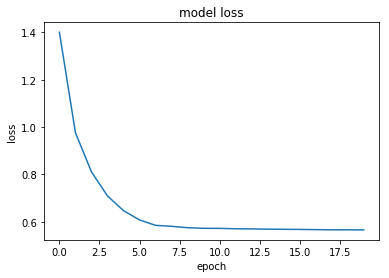

In [738]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [739]:
dnn_pred = model.predict(test)

In [741]:
h = pd.Series(list(dnn_pred))


In [742]:
data_test['Price'] = dnn_pred

/home/aayushi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [706]:
data_test[['Price']].to_csv('prediction3.csv', index=False)

Highest accuracy achieved with XGBOOST.




Accuracy: 70.0086%